**Name**: Renny Wang Itick

**Kaggle**: https://www.kaggle.com/rennywang96

**Intro**: 

this excise is a continuous work of the first titanic notbook (ex1), to catch up quikly we'll take the data and edit it fast with the same logic (based on previous work), then we shall preform CV, search for hyper parameters and embeding to create the final model.

**General workflow**:

1.Get the given data in to our code

2.Clean and sort data

3.Create and train find best version of our model

4.Submit the best model to the competition

In [ ]:
# # import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# # get csv's paths, in order
# paths = []
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         paths.append(os.path.join(dirname, filename))
# paths

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
original_train_df = pd.read_csv("/content/drive/MyDrive/CS - Courses/ML/EX3/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/CS - Courses/ML/EX3/test.csv")
original_train_df

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/CS - Courses/ML/EX3/test.csv")
submission_passengers_id = test_df['PassengerId']
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
submission_df = pd.read_csv("/content/drive/MyDrive/CS - Courses/ML/EX3/gender_submission.csv")
submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


**Now lets see the dataframes wer'e proivide with:**

In [ ]:
# original_train_df = pd.read_csv(paths[0])
# print("train data:")
# original_train_df


In [ ]:
# test_df = pd.read_csv(paths[1])
# print("test data:")
# test_df

In [ ]:
# submission_df = pd.read_csv(paths[2])
# print("gender submission:")
# submission_df


See what type of data are we a handaling:

In [ ]:
original_train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

After we got the data into our code, we need to clean it, so we'll check if there's any missing information

In [ ]:
# count empty values in each column
def check_missing_values_in_df(df: pd.DataFrame):
  print('missing values')
  print('------------')
  for col in df.columns:
    print(f"{col}: {df[col].isna().sum()}")
    
check_missing_values_in_df(original_train_df)

missing values
------------
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


as we can see some information is missing in the train data set, one way to overcome this issue is to fill it up as best as we can, so for numeric values we can insert the median value and for catagorical values we can pick one of the options randomly

In [ ]:
# insert median as the missing numeric value
def insert_median(df, column_name):
  df_not_null = df[~df[column_name].isnull()]
  df[column_name].fillna(df_not_null[column_name].median(), inplace=True)

# insert a random option to missing catagorical value
def insert_random_option(df, column_name):
  df_not_null = df[~df[column_name].isnull()]
  df_null = df[df[column_name].isnull()]
  options = np.random.choice(df_not_null[column_name])
  df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)
    
# fill up the df
insert_median(original_train_df, 'Age')
insert_random_option(original_train_df, 'Cabin')
insert_random_option(original_train_df, 'Embarked')
check_missing_values_in_df(original_train_df)

missing values
------------
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 0
Embarked: 0


now that all of the missing values are dealt with we can continue, lets get rid of some obviously unrelated attributes that are super unlikely to have any effect of survivability

In [ ]:
# remove unrelated attributes
original_train_df = original_train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
original_train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,F2,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,B79,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,B28,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,C30,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,28.0,1,2,23.4500,A14,S
889,1,1,male,26.0,0,0,30.0000,C148,C


we should convert all the catagorical values to numeric values to get the right graphical representation, for that we can use LableEncoder and OneHotEncoder from sklearn

In [ ]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# change Cabin and Embarked to numeric
lb = sklearn.preprocessing.LabelEncoder()
original_train_df['Cabin'] = lb.fit_transform(original_train_df['Cabin'])
original_train_df['Embarked'] = lb.fit_transform(original_train_df['Embarked'])

# using OneHotEncoder from sklearn to change Sex to 0/1 values.
enc = OneHotEncoder(sparse=False, drop='first')
original_train_df_cat = original_train_df[['Sex']]
original_train_df_cat_enc = pd.DataFrame(enc.fit_transform(original_train_df_cat), columns=enc.get_feature_names_out())
original_train_df = original_train_df.drop(['Sex'], axis=1).join(original_train_df_cat_enc) # remove Sex column and concations the encoding column
original_train_df


,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male
0,0,3,22.0,1,0,7.2500,141,2,1.0
1,1,1,38.0,1,0,71.2833,81,0,0.0
2,1,3,26.0,0,0,7.9250,42,2,0.0
3,1,1,35.0,1,0,53.1000,55,2,0.0
4,0,3,35.0,0,0,8.0500,21,2,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,64,2,1.0
887,1,1,19.0,0,0,30.0000,30,2,0.0
888,0,3,28.0,1,2,23.4500,1,2,0.0
889,1,1,26.0,0,0,30.0000,60,0,1.0


after the conversion we can create a matrix representation of correlations

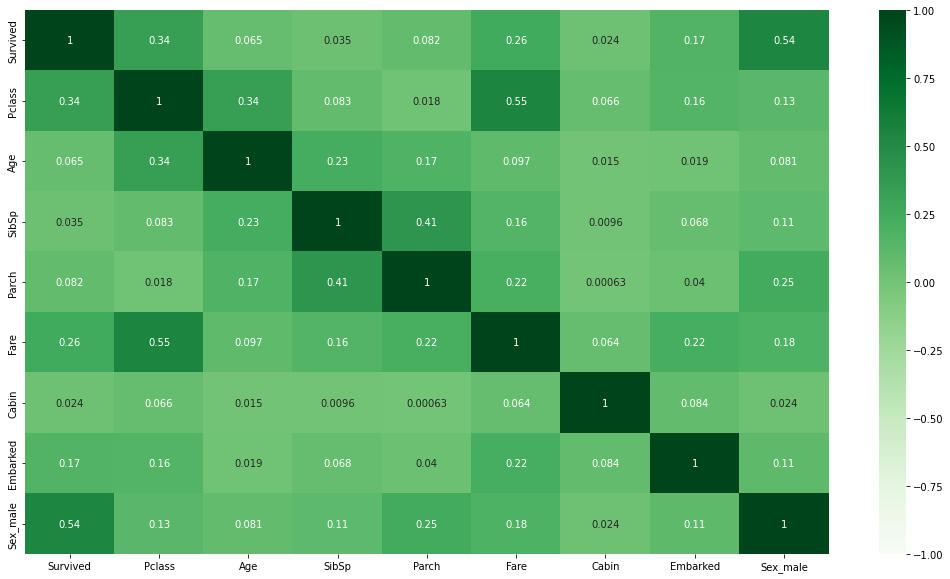

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# show absolute correlation between features in a heatmap
def plot_heatmap(data):
  plt.figure(figsize=(18,10))
  cor = np.abs(data.corr())
  sns.heatmap(cor, annot=True, cmap=plt.cm.Greens, vmin=-1, vmax=1)
  plt.show()
    
    
plot_heatmap(original_train_df)

from the matrix we can conclude which attribues are correlated the most with our  Model Target --> Survivied attribute (sex_male, pclass,fare...), we can also see which attributes have a strong corerelation between them so we can might benifit from combining them to a single attribute (fare & pclass for example, in our mesurment would be consider high).
another possibility is to dissmiss a feature which has a insignificant correlation rate, such as the Cabin feature

To test out our addition  of features  we'll create a new corelation matrix with the new features to see if there is any sense in creating the models.





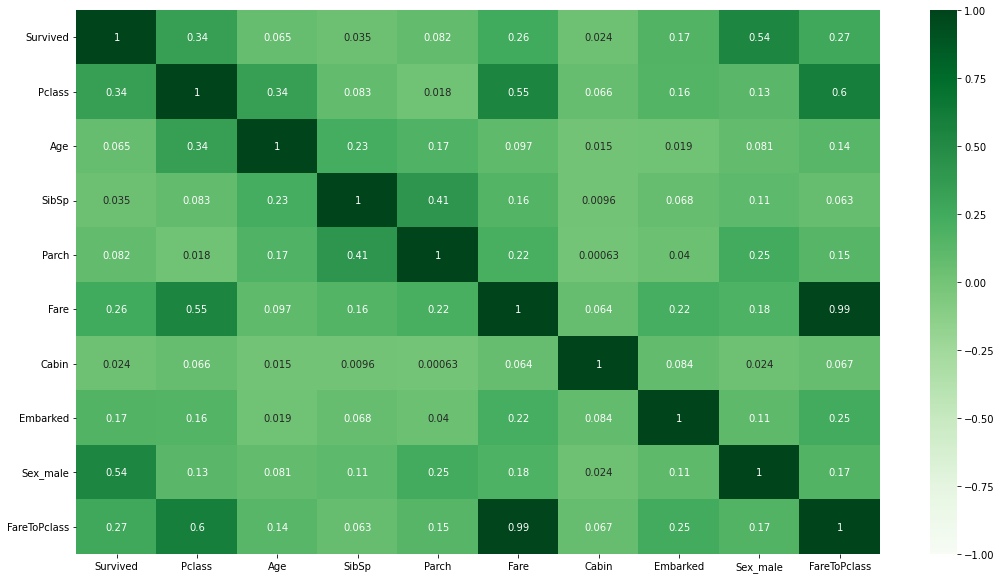

In [ ]:
newf_original_train_df = original_train_df.copy()
newf_original_train_df['FareToPclass'] = original_train_df['Fare'] / original_train_df['Pclass']

plot_heatmap(newf_original_train_df)

it seems that the relation between the Fare and our new created feature FareToClass is practically one to one and wouldn't have any significant changes on the models, there is only a 0.01 difference to using the plaine Fare feature.
all in all we can say confidently that this addition of featue is miniscule so we won't make models for that scenario.



we'll set the input and the ouput of our data, t = target, x= df without the survived col for the original data and for a copy that will not include the Cabin feature.

In [ ]:
# divide the train data to features and target
t = original_train_df['Survived'].copy()
x = original_train_df.drop(['Survived'], axis=1)
print('target (t):')
display(t)
print()
print('inputs (x):')
display(x)

target (t):


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


inputs (x):


,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male
0,3,22.0,1,0,7.2500,141,2,1.0
1,1,38.0,1,0,71.2833,81,0,0.0
2,3,26.0,0,0,7.9250,42,2,0.0
3,1,35.0,1,0,53.1000,55,2,0.0
4,3,35.0,0,0,8.0500,21,2,1.0
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,64,2,1.0
887,1,19.0,0,0,30.0000,30,2,0.0
888,3,28.0,1,2,23.4500,1,2,0.0
889,1,26.0,0,0,30.0000,60,0,1.0


In [ ]:
noCabin_original_train_df = original_train_df.copy()
noCabin_original_train_df = noCabin_original_train_df.drop(['Cabin'], axis=1)
# divide the train data to features and target
noCabin_t = noCabin_original_train_df['Survived'].copy()
noCabin_x = noCabin_original_train_df.drop(['Survived'], axis=1)
print('noCabin_target (t):')
display(noCabin_t)
print()
print('noCabin_inputs (x):')
display(noCabin_x)

noCabin_target (t):


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


noCabin_inputs (x):


,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,3,22.0,1,0,7.2500,2,1.0
1,1,38.0,1,0,71.2833,0,0.0
2,3,26.0,0,0,7.9250,2,0.0
3,1,35.0,1,0,53.1000,2,0.0
4,3,35.0,0,0,8.0500,2,1.0
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,2,1.0
887,1,19.0,0,0,30.0000,2,0.0
888,3,28.0,1,2,23.4500,2,0.0
889,1,26.0,0,0,30.0000,0,1.0


for the solution we can cosider between two models, Logistic Regression and MLP,for each we'll calculate the best ratio of train to val and we will pick the model which preformes best,that would be the one that has the highest Score

In [ ]:
from sklearn import linear_model, neural_network
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# def the models
models = [
    linear_model.SGDClassifier(loss="log", alpha=0, learning_rate="constant", eta0=0.003,max_iter=5000),
    neural_network.MLPClassifier(max_iter=5000, activation="logistic",hidden_layer_sizes=(7,7,)),
    ]

    
# def testing
def test_model(model, X_test, t_test, t_test_pred):
    test_score = model.score(X_test, t_test)
    test_loss = metrics.log_loss(t_test, t_test_pred)
    return test_score, test_loss




In [ ]:
splits_to_test = 100

test_sizes = [.1, .15, .2, .25]
loss_data = {}
accu_data = {}

#init dicts
for size in test_sizes:
    loss_data[size] = {}
    accu_data[size] = {}

for m in models:
    for size in test_sizes:
        model_name = str(m).split("(")[0]
        loss_data[size][model_name] = []
        accu_data[size][model_name] = []
        
for size in test_sizes:
    for i in range(splits_to_test):
        X_train_check, X_test_check ,t_train_check, t_test_check = train_test_split(x,t, test_size=size)
        for m_i, m in zip(range(1, len(models) + 1),models):
            #Print status
            print(f"Currently testing split number: %d out of %d       (%d models out of %d)" \
                  % (i+1, splits_to_test, m_i, len(models)), end="\r")
            model_name = str(m).split("(")[0]

            # Fit current model
            model = make_pipeline(StandardScaler(), m).fit(X_train_check, t_train_check)

            # Validate test data
            pred = model.predict_proba(X_test_check)
            score, loss = test_model(model, X_test_check, t_test_check, pred)

            # Add data to a dict
            loss_data[size][model_name].append(loss) 
            accu_data[size][model_name].append(score) 
    print("\nDone size: ", size)
print("\nDONE")


Done size:  0.1

Done size:  0.15

Done size:  0.2

Done size:  0.25

DONE


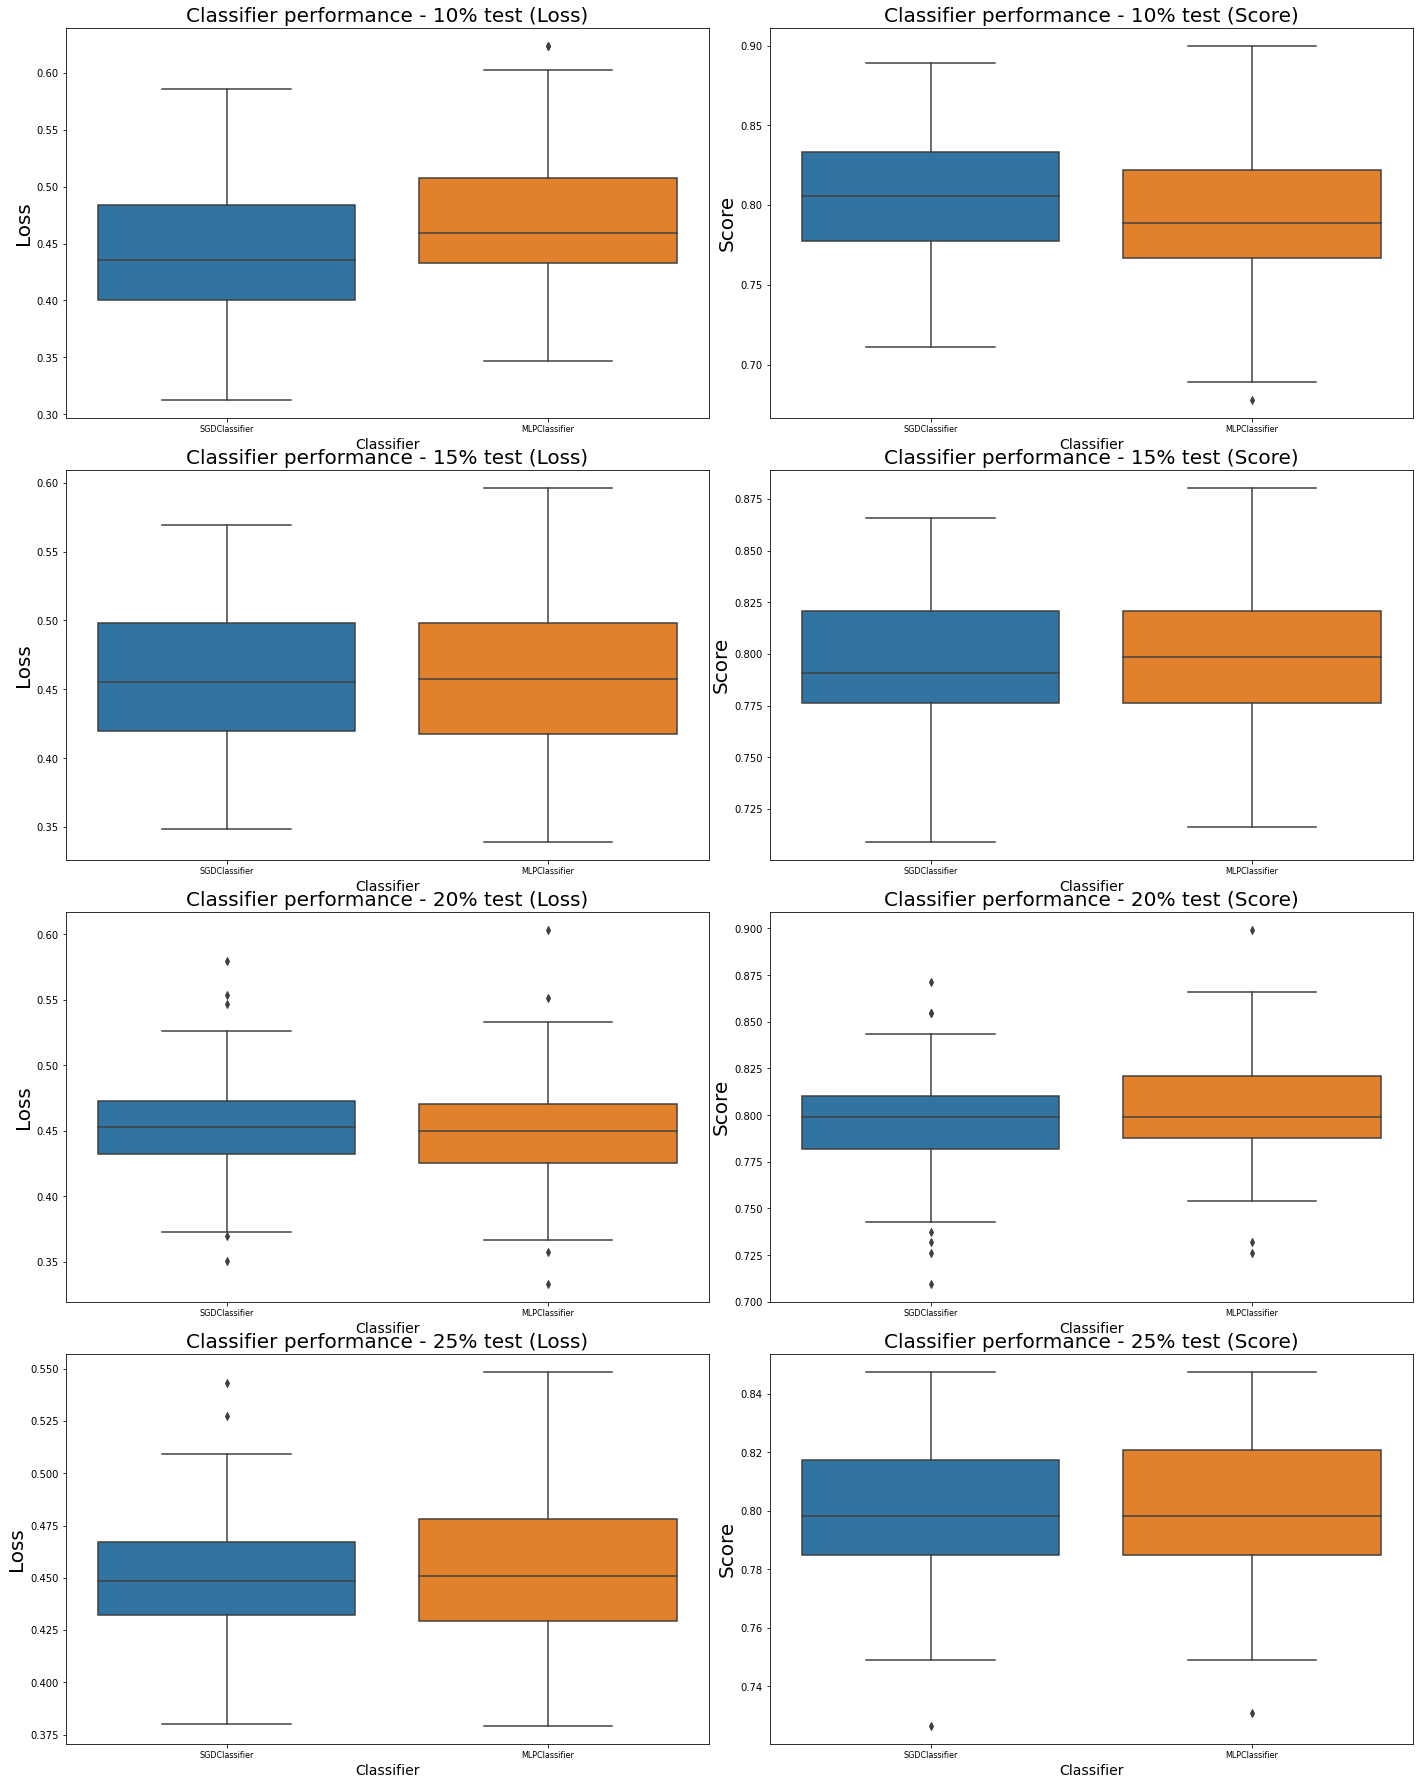

SGD accu means: 10%, 15%,20%,25%
[0.8038888888888889, 0.797089552238806, 0.7962011173184359, 0.7986995515695067]
MLP accu means: 10%, 15%,20%,25%
[0.7939999999999999, 0.7990298507462685, 0.801731843575419, 0.7993273542600897]


In [ ]:
plt.rcParams["figure.figsize"] = (20, 25)
plt.rcParams["xtick.labelsize"] = 8
fig, axe = plt.subplots(len(test_sizes),2)
fig.tight_layout(pad=3.2)

SGDs_accu_means = []
MLPs_accu_means = []

for s,ax_location in zip(test_sizes, range(len(test_sizes))):
    loss_df = pd.melt(pd.DataFrame.from_dict(loss_data[s]))
    accu_df = pd.melt(pd.DataFrame.from_dict(accu_data[s]))
    
    ax_loss = sns.boxplot(x="variable", y= "value", data=loss_df, ax=axe[ax_location][0])
    ax_loss.set_xlabel("Classifier", fontsize=14)
    ax_loss.set_ylabel("Loss", fontsize=20)
    ax_loss.set_title(f"Classifier performance - %d%% test (Loss)" % ( s * 100), fontsize=20)

    
    ax_score = sns.boxplot(x="variable", y= "value", data=accu_df, ax=axe[ax_location][1])
    ax_score.set_xlabel("Classifier", fontsize=14)
    ax_score.set_ylabel("Score", fontsize=20)
    ax_score.set_title(f"Classifier performance - %d%% test (Score)" % ( s * 100), fontsize=20)
  
    df = accu_df[accu_df.variable == "SGDClassifier"]
    SGDs_accu_means.append(df["value"].mean())
    df = accu_df[accu_df.variable != "SGDClassifier"]
    MLPs_accu_means.append(df["value"].mean())
    
plt.show()
# loss_df
print("SGD accu means: 10%, 15%,20%,25%")
print(SGDs_accu_means)
print("MLP accu means: 10%, 15%,20%,25%")
print(MLPs_accu_means)

although the results are quite similar,the best preforming model was the MLP model with 25% of the data used in the validation test.

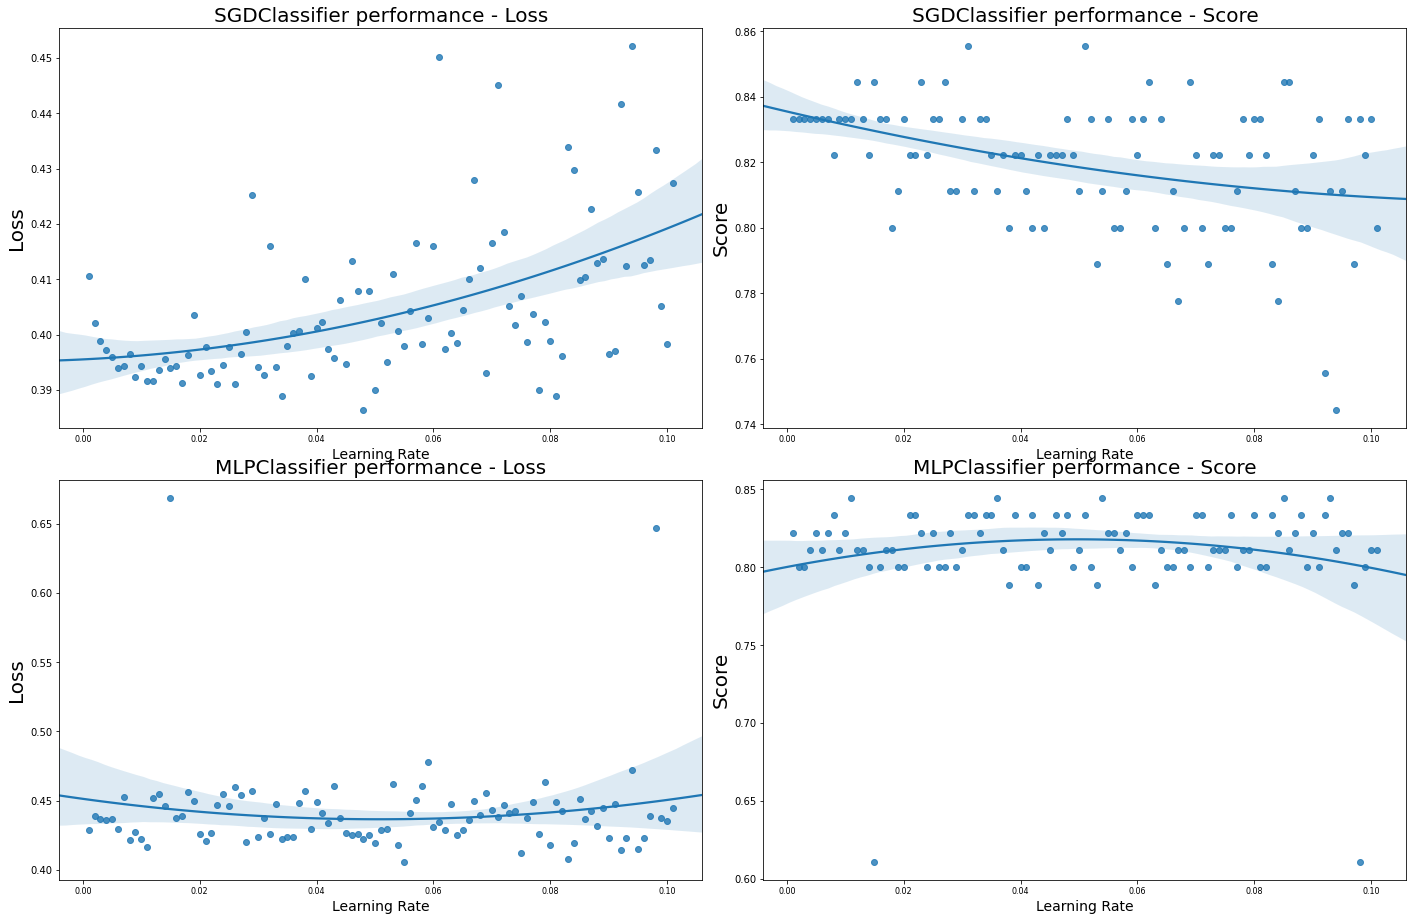

In [ ]:
plt.rcParams["figure.figsize"] = (20, 13)



# loss_data = {}
# accu_data = {}
x_values = []
loss_values = []
score_values = []
size = 0.1
X_train, X_test ,t_train, t_test = train_test_split(x,t, test_size=size)

base_learning_rate = .001
max_learning_rate = 0.1

for delta_lr in range(0,int(max_learning_rate / base_learning_rate) + 1):
    gcd_test_hyperparameter = linear_model.SGDClassifier(loss="log", alpha=0, learning_rate="constant", eta0=base_learning_rate + delta_lr / 1000, max_iter=5000)
    model = make_pipeline(StandardScaler(), gcd_test_hyperparameter).fit(X_train, t_train)
    
    # Validate test data
    pred = model.predict_proba(X_test)
    score, loss = test_model(model, X_test, t_test, pred)

    x_values.append(base_learning_rate + delta_lr / 1000)
    loss_values.append(loss)
    score_values.append(score)

fig, axe = plt.subplots(2,2)
fig.tight_layout(pad=3.2)

sgd_dataframe = pd.DataFrame({"x":x_values,"loss":loss_values,"score":score_values})
sgd_dataframe
ax_loss = sns.regplot(data=sgd_dataframe,x="x",y="loss",ax=axe[0][0], truncate=False, order=2)
ax_loss.set_xlabel("Learning Rate", fontsize=14)
ax_loss.set_ylabel("Loss", fontsize=20)
ax_loss.set_title(f"SGDClassifier performance - Loss", fontsize=20)


ax_score = sns.regplot(data=sgd_dataframe,x="x",y="score",ax=axe[0][1], truncate=False, order=2)
ax_score.set_xlabel("Learning Rate", fontsize=14)
ax_score.set_ylabel("Score", fontsize=20)
ax_score.set_title(f"SGDClassifier performance - Score" , fontsize=20)


x_values = []
loss_values = []
score_values = []
for delta_lr in range(0,int(max_learning_rate / base_learning_rate) + 1):
    gcd_test_hyperparameter = neural_network.MLPClassifier(max_iter=5000, activation="logistic",hidden_layer_sizes=(7,7,))
    model = make_pipeline(StandardScaler(), gcd_test_hyperparameter).fit(X_train, t_train)
    
    # Validate test data
    pred = model.predict_proba(X_test)
    score, loss = test_model(model, X_test, t_test, pred)

    x_values.append(base_learning_rate + delta_lr / 1000)
    loss_values.append(loss)
    score_values.append(score)

sgd_dataframe = pd.DataFrame({"x":x_values,"loss":loss_values,"score":score_values})
sgd_dataframe
ax_loss = sns.regplot(data=sgd_dataframe,x="x",y="loss",ax=axe[1][0], truncate=False, order=2)
ax_loss.set_xlabel("Learning Rate", fontsize=14)
ax_loss.set_ylabel("Loss", fontsize=20)
ax_loss.set_title(f"MLPClassifier performance - Loss", fontsize=20)


ax_score = sns.regplot(data=sgd_dataframe,x="x",y="score",ax=axe[1][1], truncate=False, order=2)
ax_score.set_xlabel("Learning Rate", fontsize=14)
ax_score.set_ylabel("Score", fontsize=20)
ax_score.set_title(f"MLPClassifier performance - Score" , fontsize=20)
plt.show()


as we can see generally the SGD model is more sensetive to changes in the Learing rate than the MPL model is, the SGD is more sturdy across the board and preforms better on smaller learning rate while the MLP preforms best around the rate of 0.015.

so our best model would be a MLP moodel with test size of 25% and a smaller learing rate of 0.015




Now lets repet the process for our version without the Cabin feature:


In [ ]:
splits_to_test = 100
x = noCabin_x
t = noCabin_t


test_sizes = [.1, .15, .2, .25]
loss_data = {}
accu_data = {}

#init dicts
for size in test_sizes:
    loss_data[size] = {}
    accu_data[size] = {}

for m in models:
    for size in test_sizes:
        model_name = str(m).split("(")[0]
        loss_data[size][model_name] = []
        accu_data[size][model_name] = []
        
for size in test_sizes:
    for i in range(splits_to_test):
        X_train_check, X_test_check ,t_train_check, t_test_check = train_test_split(x,t, test_size=size)
        for m_i, m in zip(range(1, len(models) + 1),models):
            #Print status
            print(f"Currently testing split number: %d out of %d       (%d models out of %d)" \
                  % (i+1, splits_to_test, m_i, len(models)), end="\r")
            model_name = str(m).split("(")[0]

            # Fit current model
            model = make_pipeline(StandardScaler(), m).fit(X_train_check, t_train_check)

            # Validate test data
            pred = model.predict_proba(X_test_check)
            score, loss = test_model(model, X_test_check, t_test_check, pred)

            # Add data to a dict
            loss_data[size][model_name].append(loss) 
            accu_data[size][model_name].append(score) 
    print("\nDone size: ", size)
print("\nDONE")


Done size:  0.1

Done size:  0.15

Done size:  0.2

Done size:  0.25

DONE


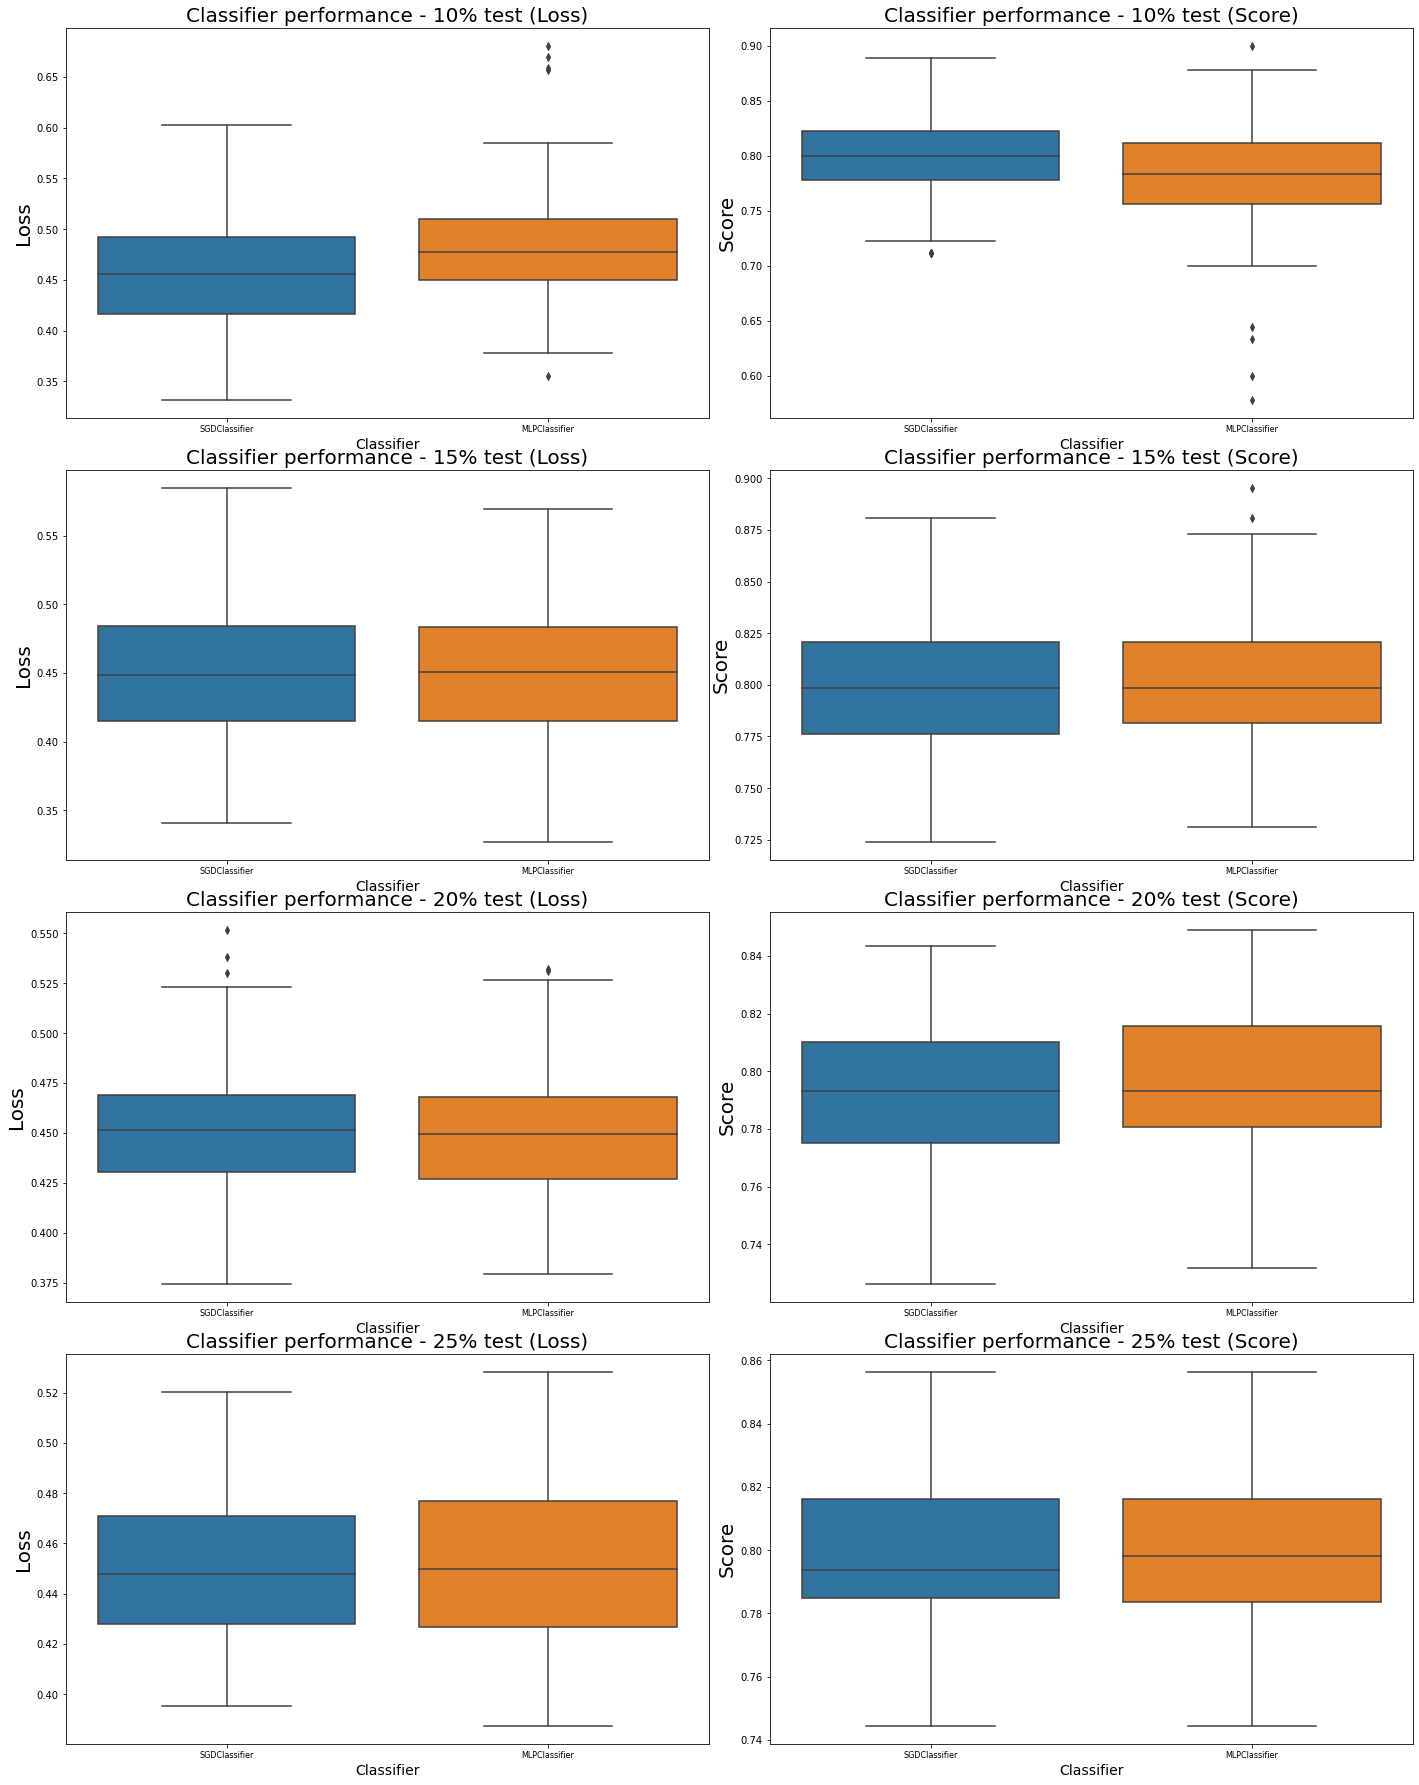

SGD accu means: 10%, 15%, 20%,25%
[0.795, 0.7992537313432837, 0.79195530726257, 0.7986098654708519]
MLP accu means: 10%, 15%, 20%,25%
[0.7806666666666666, 0.8013432835820896, 0.7967597765363128, 0.7985201793721971]


In [ ]:
plt.rcParams["figure.figsize"] = (20, 25)
plt.rcParams["xtick.labelsize"] = 8
fig, axe = plt.subplots(len(test_sizes),2)
fig.tight_layout(pad=3.2)

SGDs_accu_means = []
MLPs_accu_means = []

for s,ax_location in zip(test_sizes, range(len(test_sizes))):
    loss_df = pd.melt(pd.DataFrame.from_dict(loss_data[s]))
    accu_df = pd.melt(pd.DataFrame.from_dict(accu_data[s]))
    
    ax_loss = sns.boxplot(x="variable", y= "value", data=loss_df, ax=axe[ax_location][0])
    ax_loss.set_xlabel("Classifier", fontsize=14)
    ax_loss.set_ylabel("Loss", fontsize=20)
    ax_loss.set_title(f"Classifier performance - %d%% test (Loss)" % ( s * 100), fontsize=20)

    
    ax_score = sns.boxplot(x="variable", y= "value", data=accu_df, ax=axe[ax_location][1])
    ax_score.set_xlabel("Classifier", fontsize=14)
    ax_score.set_ylabel("Score", fontsize=20)
    ax_score.set_title(f"Classifier performance - %d%% test (Score)" % ( s * 100), fontsize=20)
  
    df = accu_df[accu_df.variable == "SGDClassifier"]
    SGDs_accu_means.append(df["value"].mean())
    df = accu_df[accu_df.variable != "SGDClassifier"]
    MLPs_accu_means.append(df["value"].mean())
    
plt.show()
# loss_df
print("SGD accu means: 10%, 15%, 20%,25%")
print(SGDs_accu_means)
print("MLP accu means: 10%, 15%, 20%,25%")
print(MLPs_accu_means)

again we see that the results are quite similar,but the best preforming model this time was the SGD model with 15% of the data used in the validation test.

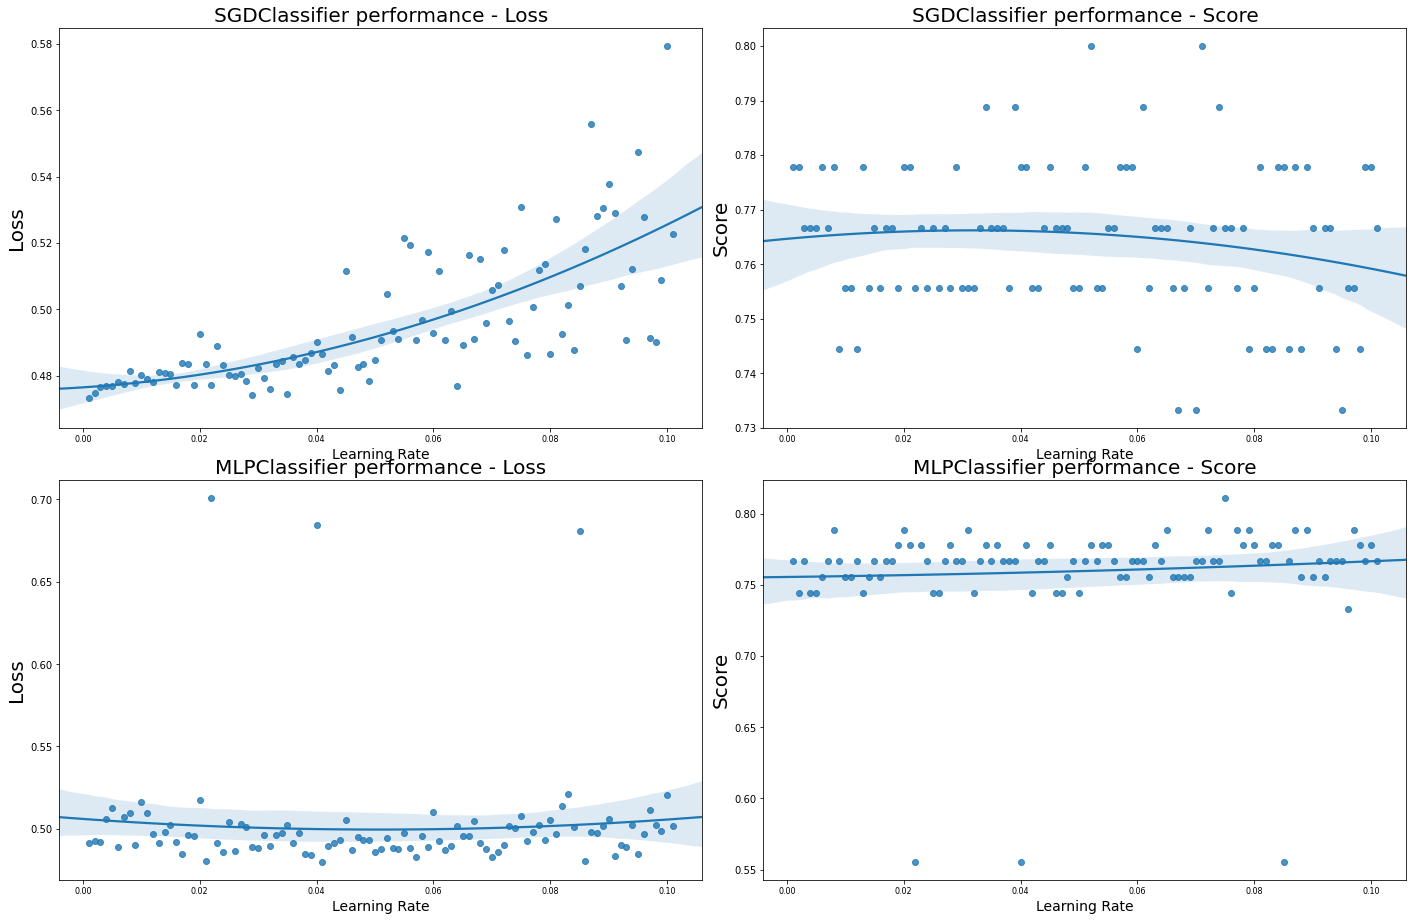

In [ ]:
plt.rcParams["figure.figsize"] = (20, 13)

# loss_data = {}
# accu_data = {}
x_values = []
loss_values = []
score_values = []
size = 0.1
X_train, X_test ,t_train, t_test = train_test_split(x,t, test_size=size)

base_learning_rate = .001
max_learning_rate = 0.1

for delta_lr in range(0,int(max_learning_rate / base_learning_rate) + 1):
    gcd_test_hyperparameter = linear_model.SGDClassifier(loss="log", alpha=0, learning_rate="constant", eta0=base_learning_rate + delta_lr / 1000, max_iter=5000)
    model = make_pipeline(StandardScaler(), gcd_test_hyperparameter).fit(X_train, t_train)
    
    # Validate test data
    pred = model.predict_proba(X_test)
    score, loss = test_model(model, X_test, t_test, pred)

    x_values.append(base_learning_rate + delta_lr / 1000)
    loss_values.append(loss)
    score_values.append(score)

fig, axe = plt.subplots(2,2)
fig.tight_layout(pad=3.2)

sgd_dataframe = pd.DataFrame({"x":x_values,"loss":loss_values,"score":score_values})
sgd_dataframe
ax_loss = sns.regplot(data=sgd_dataframe,x="x",y="loss",ax=axe[0][0], truncate=False, order=2)
ax_loss.set_xlabel("Learning Rate", fontsize=14)
ax_loss.set_ylabel("Loss", fontsize=20)
ax_loss.set_title(f"SGDClassifier performance - Loss", fontsize=20)


ax_score = sns.regplot(data=sgd_dataframe,x="x",y="score",ax=axe[0][1], truncate=False, order=2)
ax_score.set_xlabel("Learning Rate", fontsize=14)
ax_score.set_ylabel("Score", fontsize=20)
ax_score.set_title(f"SGDClassifier performance - Score" , fontsize=20)


x_values = []
loss_values = []
score_values = []
for delta_lr in range(0,int(max_learning_rate / base_learning_rate) + 1):
    gcd_test_hyperparameter = neural_network.MLPClassifier(max_iter=5000, activation="logistic",hidden_layer_sizes=(7,7,))
    model = make_pipeline(StandardScaler(), gcd_test_hyperparameter).fit(X_train, t_train)
    
    # Validate test data
    pred = model.predict_proba(X_test)
    score, loss = test_model(model, X_test, t_test, pred)

    x_values.append(base_learning_rate + delta_lr / 1000)
    loss_values.append(loss)
    score_values.append(score)

sgd_dataframe = pd.DataFrame({"x":x_values,"loss":loss_values,"score":score_values})
sgd_dataframe
ax_loss = sns.regplot(data=sgd_dataframe,x="x",y="loss",ax=axe[1][0], truncate=False, order=2)
ax_loss.set_xlabel("Learning Rate", fontsize=14)
ax_loss.set_ylabel("Loss", fontsize=20)
ax_loss.set_title(f"MLPClassifier performance - Loss", fontsize=20)


ax_score = sns.regplot(data=sgd_dataframe,x="x",y="score",ax=axe[1][1], truncate=False, order=2)
ax_score.set_xlabel("Learning Rate", fontsize=14)
ax_score.set_ylabel("Score", fontsize=20)
ax_score.set_title(f"MLPClassifier performance - Score" , fontsize=20)
plt.show()

we see that same behaviour of the models for the changes in learning rate,

best model with Cabin: MLP, 25% validation --> score = 0.7973991031390135

best model without Cabin: SGD, 15% validation --> score = 0.8017164179104478

so our best model would be a SGD model with test size of 15% and a smaller learing rate of 0.01 without the Cabin feature

set test data:

In [ ]:
unchanged_test_df = pd.read_csv("/content/drive/MyDrive/CS - Courses/ML/EX3/test.csv")
test_df = pd.read_csv("/content/drive/MyDrive/CS - Courses/ML/EX3/test.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# unchanged_test_df = pd.read_csv(paths[1])
# test_df = pd.read_csv(paths[1])
# test_df

In [ ]:
insert_median(test_df, 'Age')
insert_random_option(test_df, 'Cabin')
insert_random_option(test_df, 'Fare')
insert_random_option(test_df, 'Embarked')
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_df['Cabin'] = lb.fit_transform(test_df['Cabin'])
test_df['Embarked'] = lb.fit_transform(test_df['Embarked'])
test_df_cat = test_df[['Sex']]
test_df_cat_enc = pd.DataFrame(enc.fit_transform(test_df_cat), columns=enc.get_feature_names_out())
test_df = test_df.drop(['Sex'], axis=1).join(test_df_cat_enc) # remove Sex column and concations the encoding column
test_df = test_df.drop(['Cabin'], axis=1)
check_missing_values_in_df(test_df)
test_df
check_missing_values_in_df(x)

missing values
------------
Pclass: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0
Sex_male: 0
missing values
------------
Pclass: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0
Sex_male: 0


train the model:

In [ ]:
t = noCabin_t
x = noCabin_x
size = 0.1
X_train, X_test ,t_train, t_test = train_test_split(x,t, test_size=size)
l_rate = .001

# gcd_test_hyperparameter = neural_network.MLPClassifier(max_iter=5000, activation="logistic",hidden_layer_sizes=(7,7,))
# model = make_pipeline(StandardScaler(), gcd_test_hyperparameter).fit(X_train, t_train)
gcd_test_hyperparameter = linear_model.SGDClassifier(loss="log", alpha=0, learning_rate="constant", eta0=l_rate)
model = make_pipeline(StandardScaler(), gcd_test_hyperparameter).fit(X_train, t_train)



model_name = model.steps[1][0]
pred = model.predict(test_df)
res = pd.DataFrame(pred, columns=["Survived"])
res_df = pd.concat([unchanged_test_df["PassengerId"], res], axis=1)
filename= f"result-%s.csv" % model_name
print("Saving file:" , filename)
res_df.set_index("PassengerId").to_csv(filename)






Saving file: result-sgdclassifier.csv


Conclution & summmary:

In this competition we got to create and play with classification models, in so we dabbled in actual model building and data scrapping and get an understanding of the effects of the data and parameters of our modles on the final results.
we got data, cleaned and manipulated to fit our input shape.
from the corelation matrix we got a general understanding on the parameters and their affiliation with the survivability of an individual on the Titanic.
then we builded models based on that data, SGD and MPL models, we check the score results with different test sizes and got a best preforming model, the SGD with 15% test size.
then we tried different learning rates on our modles, and combined our trials to get the best verion of our model - SGD ,15%, low learing rate.
Lastly we run the model on the test data, save the results and submitted it to the Kaggle competition.

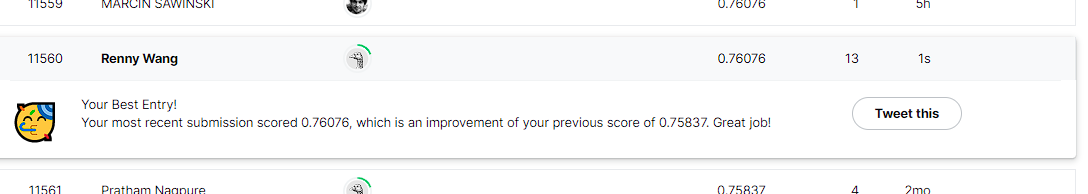

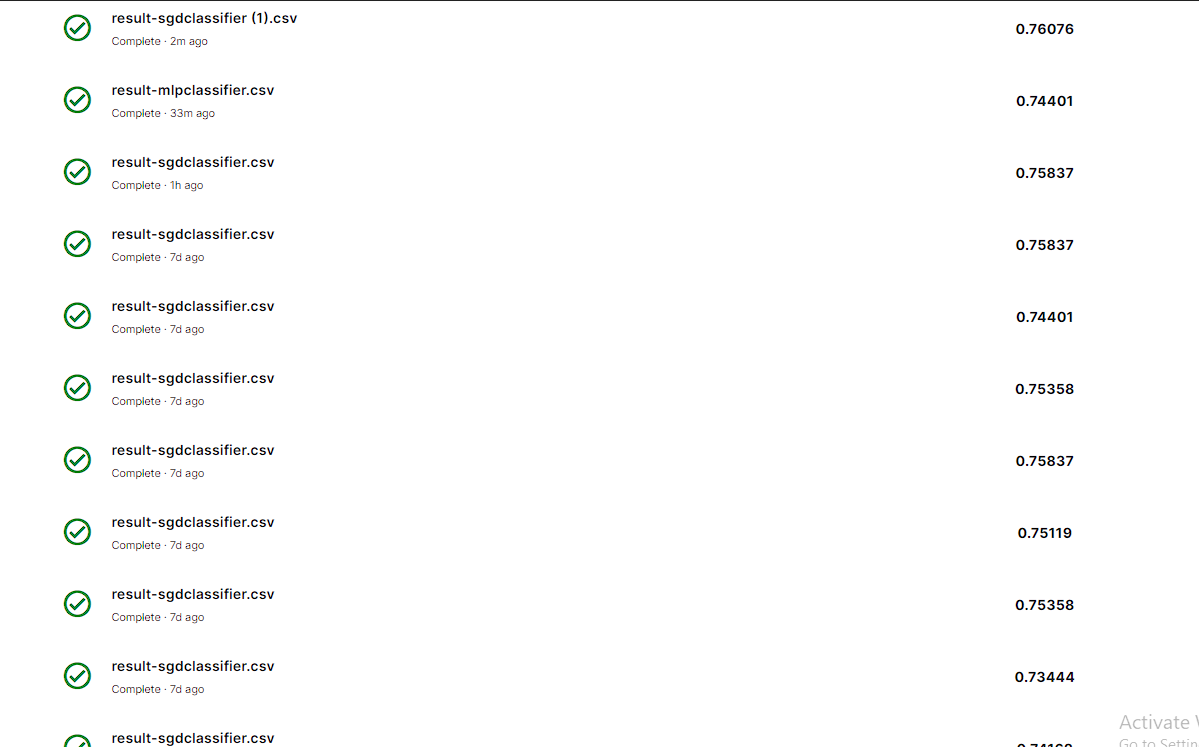

References:

Beginner Kaggle Data Science Project Walk-Through (Titanic)

https://www.youtube.com/watch?v=I3FBJdiExcg&ab_channel=KenJee

Getting Started with Titanic - Very Basic Approch

https://www.kaggle.com/code/vshantam/getting-started-with-titanic-very-basic-approch


How to do the Titanic Kaggle Competition

https://www.youtube.com/watch?v=pUSi5xexT4Q&ab_channel=AladdinPersson

**Start of part 2 (ex3):**
by now we got the best result for the SGD model we will will continue to optimize our results with it.

let's start with adding fucntions that will prefome the Cross Validation, calculate metrics and plot confusion metrix

In [ ]:
# find generator length
from tqdm.auto import tqdm

def find_generator_len(generator, use_pbar=True):
    i = 0
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')
    for a in generator:
        i += 1
        if use_pbar:
            pbar.update()
    if use_pbar:
        pbar.close()
    return i

In [ ]:
# calculate model metrics

def calc_metrics(cm):
  tn, fp, fn, tp = cm.ravel()
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  specificity = tn/(tn+fp)
  fpr = fp/(fp+tn)
  f1 = (2*precision * recall)/(precision + recall)
  balanced_accuracy = (recall + specificity)/2
  
  return {
      'precision': precision,
      'recall': recall,
      'specificity': specificity,
      'fpr': fpr,
      'accuracy': accuracy,
      'f1': f1,
      'balanced accuracy': balanced_accuracy,
  }

In [ ]:
# print all metrics from confusion_matrix for train and validation
def print_confusion_matrix(model, cm_train, cm_val):
  cm_train_df = pd.DataFrame(cm_train, index=['actual_0', 'actual_1'], columns=['predicted_0', 'predicted_1'])
  cm_val_df = pd.DataFrame(cm_val, index=['actual_0', 'actual_1'], columns=['predicted_0', 'predicted_1'])

  print('Confusion Matrix')
  fig, ax = plt.subplots(ncols=2, figsize=(10,3))
  for i, (df, title) in enumerate(zip([cm_train_df, cm_val_df], ['Train', 'Validation'])):
    fig = sns.heatmap(df, annot=True, ax=ax[i], cmap=plt.cm.Pastel1, fmt='g')
    fig.set_title(title)
  plt.subplots_adjust(top=1.5, bottom=0, left=0, right=1)
  plt.show()

  display(pd.DataFrame({ 'Tarin': calc_metrics(cm_train), 'Validation': calc_metrics(cm_val) }))

for the CV we will use KFold since LPO demands loads of calculation (apon all possible combinations) and would be more appropriate on smaller dataset

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import plotly.express as px


# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
  scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

  if k is not None:
    cv = KFold(n_splits=k, shuffle=True, random_state=2)
  elif p is not None:
    cv = LeavePOut(p)
  else:
    raise ValueError("Must specify either `K` or `P`.")

  if use_pbar:
    pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

  for i, (train_ids, val_ids) in enumerate(cv.split(X)):
    X_train = X.loc[train_ids]
    t_train = t.loc[train_ids]
    X_val = X.loc[val_ids]
    t_val = t.loc[val_ids]

    model.fit(X_train, t_train)

    y_train = model.predict_proba(X_train)
    y_val = model.predict_proba(X_val)

    scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), metrics.log_loss(t_train, y_train)]
    scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), metrics.log_loss(t_val, y_val)]

    if use_pbar:
      pbar.update()

  if use_pbar:
    pbar.close()

  val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
  train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

  mean_val_score = val_scores_losses_df['score'].mean()
  mean_val_loss = val_scores_losses_df['loss'].mean()
  mean_train_score = train_scores_losses_df['score'].mean()
  mean_train_loss = train_scores_losses_df['loss'].mean()
  cm_train = confusion_matrix(t_train, model.predict(X_train))
  cm_val = confusion_matrix(t_val, model.predict(X_val))

  if show_score_loss_graphs:
    fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Validation Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
    fig.show()
    fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Validation Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
    fig.show()
    print_confusion_matrix(model, cm_train, cm_val)

  return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

**Data Proccesing**

the last version of the data:

In [ ]:
x

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,3,22.0,1,0,7.2500,2,1.0
1,1,38.0,1,0,71.2833,0,0.0
2,3,26.0,0,0,7.9250,2,0.0
3,1,35.0,1,0,53.1000,2,0.0
4,3,35.0,0,0,8.0500,2,1.0
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,2,1.0
887,1,19.0,0,0,30.0000,2,0.0
888,3,28.0,1,2,23.4500,2,0.0
889,1,26.0,0,0,30.0000,0,1.0


In [ ]:
t

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

normalize the data (in the last part we didn't normilze it beforhand), we already encoded the data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

#normalize the data with MinMaxScaler 
all_cols = x.columns
ct_std = ColumnTransformer([("standard", MinMaxScaler(), all_cols)])
X_encoded = pd.DataFrame(ct_std.fit_transform(x, t), columns=all_cols)
X_encoded

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,1.0,0.271174,0.125,0.000000,0.014151,1.0,1.0
1,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0
2,1.0,0.321438,0.000,0.000000,0.015469,1.0,0.0
3,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.0
4,1.0,0.434531,0.000,0.000000,0.015713,1.0,1.0
...,...,...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374,1.0,1.0
887,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0
888,1.0,0.346569,0.125,0.333333,0.045771,1.0,0.0
889,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0


**Feature Selection**

let's better our model by using feature selection methonds on the features we already endit and choose in the first part.

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import SGDClassifier
import plotly.graph_objects as go

# get best feature combinations
selector = RFECV(SGDClassifier(loss='log', random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(X_encoded, t)
X_selected_features = X_encoded.loc[:, selector.support_]
display(X_selected_features)


,Pclass,Age,SibSp,Sex_male
0,1.0,0.271174,0.125,1.0
1,0.0,0.472229,0.125,0.0
2,1.0,0.321438,0.000,0.0
3,0.0,0.434531,0.125,0.0
4,1.0,0.434531,0.000,1.0
...,...,...,...,...
886,0.5,0.334004,0.000,1.0
887,0.0,0.233476,0.000,0.0
888,1.0,0.346569,0.125,0.0
889,0.0,0.321438,0.000,1.0


In [ ]:
# plot the result from the selector
fig = go.Figure()
results = selector.cv_results_['mean_test_score'] # Getting the mean cv score for each set of features
fig.add_trace(go.Scatter(x=[i for i in range(1, len(results) + 1)], y=results))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

Confusion Matrix


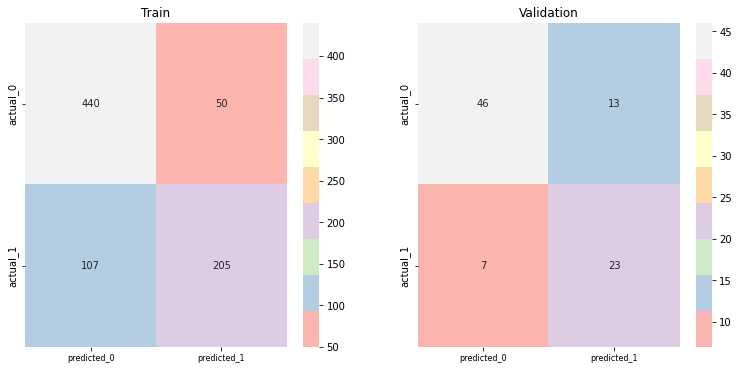

,Tarin,Validation
precision,0.803922,0.638889
recall,0.657051,0.766667
specificity,0.897959,0.779661
fpr,0.102041,0.220339
accuracy,0.804239,0.775281
f1,0.723104,0.696970
balanced accuracy,0.777505,0.773164


mean cv val score: 0.78
mean cv val loss 0.50
mean cv train score: 0.78
mean cv train loss 0.48


In [ ]:
#  calculate the metrix for the model with the best features
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features, t, SGDClassifier(loss='log', random_state=42), k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

**Hyper-Parameters Search**

we will use 2 method for finding the best possible values of hyper parameters, gridsearch and randomsearch.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# train with grid search and get best parameters
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha':[0.0001, 0.001, 0.01, 0.1]}

gs_model = GridSearchCV(SGDClassifier(random_state=1), hyper_parameters).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for classification:
gs_model 0.7934844014813885
best params {'alpha': 0.0001, 'penalty': 'elasticnet'}


gridSearch is much more thorough in the search of the better values, yet the randomSearch is quicker.

In [ ]:
# train with random search and get best parameters
np.random.seed(1)
distributions = dict(alpha=uniform(loc=0, scale=1), penalty=['l2', 'l1', 'elasticnet'])

rs_model = RandomizedSearchCV(SGDClassifier(), distributions, random_state=1).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('rs_model', rs_model.best_score_)
print('best params', rs_model.best_params_)

Accuracy score for classification:
rs_model 0.7867365513778168
best params {'alpha': 0.0923385947687978, 'penalty': 'l2'}


as expected the values from the gridSearch preforms better than the randomSearch, although with no great difference

we'll continue with the parametes or the gridSearch

**Ensembles**

we'll try bagging and boosting

**Bagging** - trains multiple models of the SGD with different subsets (or baggs..) randomly picked and get the voting decision from all of them

In [ ]:
from sklearn.ensemble import BaggingClassifier

# get score with nfold bagging
bag_fold_model = BaggingClassifier(base_estimator=SGDClassifier(penalty='elasticnet', alpha=0.001), n_estimators=20, random_state=1, bootstrap=False).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('bag_fold_model', bag_fold_model.score(X_selected_features, t).mean())

Accuracy score for classification:
bag_fold_model 0.7867564534231201


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

Confusion Matrix


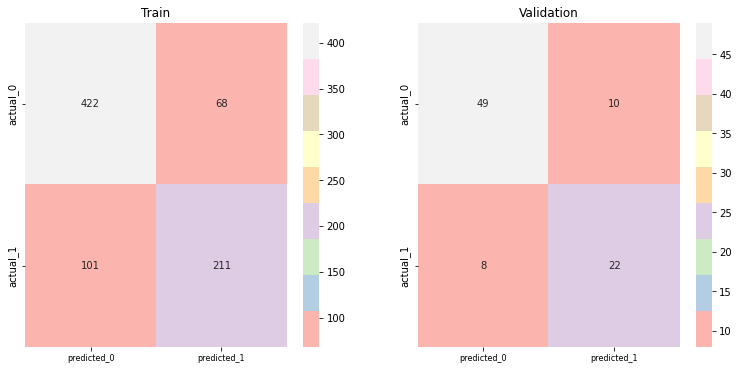

,Tarin,Validation
precision,0.756272,0.687500
recall,0.676282,0.733333
specificity,0.861224,0.830508
fpr,0.138776,0.169492
accuracy,0.789277,0.797753
f1,0.714044,0.709677
balanced accuracy,0.768753,0.781921


mean cv val score: 0.79
mean cv val loss 7.29
mean cv val score: 0.79
mean cv val loss 7.25


In [ ]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features, t, bag_fold_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

In [ ]:
# get score with bootstrap bagging
bag_boot_model = BaggingClassifier(base_estimator=SGDClassifier(penalty='elasticnet', alpha=0.001), n_estimators=20, random_state=1, bootstrap=True).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('bag_boot_model', bag_boot_model.score(X_selected_features, t).mean())

Accuracy score for classification:
bag_boot_model 0.7912457912457912


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

Confusion Matrix


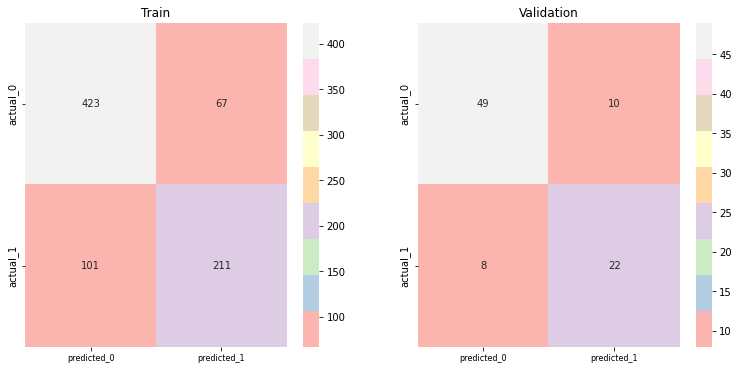

,Tarin,Validation
precision,0.758993,0.687500
recall,0.676282,0.733333
specificity,0.863265,0.830508
fpr,0.136735,0.169492
accuracy,0.790524,0.797753
f1,0.715254,0.709677
balanced accuracy,0.769774,0.781921


mean cv val score: 0.79
mean cv val loss 5.20
mean cv val score: 0.79
mean cv val loss 5.06


In [ ]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features, t, bag_boot_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

**Boosting** - a variant of bagging, gives more emphasis on selecting datasets that gives wrong predictions.

guessing this emphasis will make the model preform better

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# get score with ada boosting
ada_boost_model = AdaBoostClassifier(base_estimator=SGDClassifier(penalty='elasticnet', alpha=0.001), algorithm='SAMME',  n_estimators=100, random_state=42).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('ada_boost_model', ada_boost_model.score(X_selected_features, t).mean())

Accuracy score for classification:
ada_boost_model 0.6161616161616161


tried to impliment adaBoostClassifier to the SGD and found out it works poorly, but discover that with the default base_estimator which is a dtree it preform above all. 

In [ ]:
# get score with ada boosting
ada_boost_model = AdaBoostClassifier(n_estimators=100, random_state=42).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('ada_boost_model', ada_boost_model.score(X_selected_features, t).mean())

Accuracy score for classification:
ada_boost_model 0.8249158249158249


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

Confusion Matrix


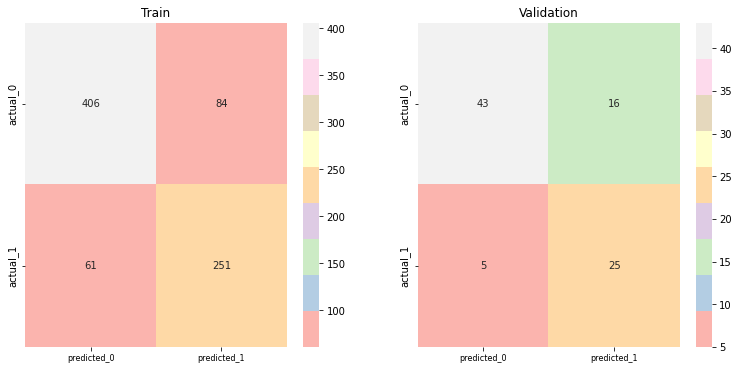

,Tarin,Validation
precision,0.749254,0.609756
recall,0.804487,0.833333
specificity,0.828571,0.728814
fpr,0.171429,0.271186
accuracy,0.819202,0.764045
f1,0.775889,0.704225
balanced accuracy,0.816529,0.781073


mean cv val score: 0.80
mean cv val loss 0.68
mean cv val score: 0.83
mean cv val loss 0.68


In [ ]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features, t, ada_boost_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

Now after we got the best cv val score we got with the best SGD model wer'e 0.80, we'll try a different algoritem.

**KNN** - the algorithem is based on 'closeness' and 'similarity' of the data point to others, we'll find out the hyper parameters for the KNN with gridSearch since it's more thorough.

Since feature selection with RFECV can't be prefom well just have an assume that the selected features for the SGDClassifier applies to the KNN (for simplicity) 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# run KNN on the dataset and find best K by accuracy
hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsClassifier(), hyper_parameters).fit(X_selected_features, t)
print('Accuracy score for classification:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

Accuracy score for classification:
gs_neigh_model 0.8069675475488042
best params {'n_neighbors': 7}


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

Confusion Matrix


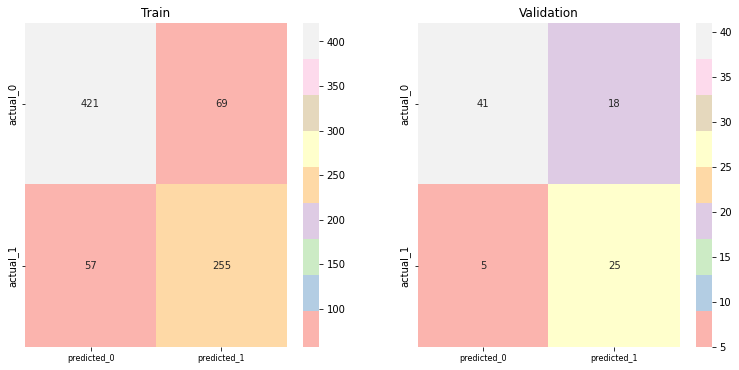

,Tarin,Validation
precision,0.787037,0.581395
recall,0.817308,0.833333
specificity,0.859184,0.694915
fpr,0.140816,0.305085
accuracy,0.842893,0.741573
f1,0.801887,0.684932
balanced accuracy,0.838246,0.764124


mean cv val score: 0.79
mean cv val loss 1.32
mean cv train score: 0.83
mean cv train loss 0.52


In [ ]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features, t, gs_neigh_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

the KNN gave a better result from our best SGD model.

the KNN doens't have an actual loss function to replect on.
In fact, this algorithm is not trained at all. The only "training" that happens for KNN, is memorising the data (creating a local copy), so that during prediction you can do a search and majority vote. Technically, no function is fitted to the data, and so, no optimization is done (it cannot be trained using gradient descent).

Apparently in our case this algorithem yields good results.

The thought of trying to boost KNN cross my mind but then i foud:

"Adaboost classifier is basically boosting algorithm, which assigns more weightage for misclassification so that it can improve accuracy in the next sequence of models that get trained. For this, the algorithm needs to use sample_weight, which is not available in the KNN classifier, as KNN only computes the nearest neighbor from train data for unknown test data, and assigns class based on max voting."

so the that is the best result we could get with the knn model.

**Naive Bayes** - The NBC model is a byesian model that should perform very well under the assumption that all the features are independen

In [ ]:
X_selected_features

,Pclass,Age,SibSp,Sex_male
0,1.0,0.271174,0.125,1.0
1,0.0,0.472229,0.125,0.0
2,1.0,0.321438,0.000,0.0
3,0.0,0.434531,0.125,0.0
4,1.0,0.434531,0.000,1.0
...,...,...,...,...
886,0.5,0.334004,0.000,1.0
887,0.0,0.233476,0.000,0.0
888,1.0,0.346569,0.125,0.0
889,0.0,0.321438,0.000,1.0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB


print('MultinomialNB score:', cross_val_score(MultinomialNB(), X_selected_features, t, cv=15).mean())


MultinomialNB score: 0.6127871939736346


In [ ]:
# us gridSearch to find hyper parameters
hyper_parameters = {'alpha':  [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}
NBC_model = GridSearchCV(MultinomialNB(), hyper_parameters).fit(X_selected_features, t)

# run best
print('MultinomialNB score:', cross_val_score(NBC_model, X_selected_features, t, cv=15).mean())

MultinomialNB score: 0.6161581920903956


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

Confusion Matrix


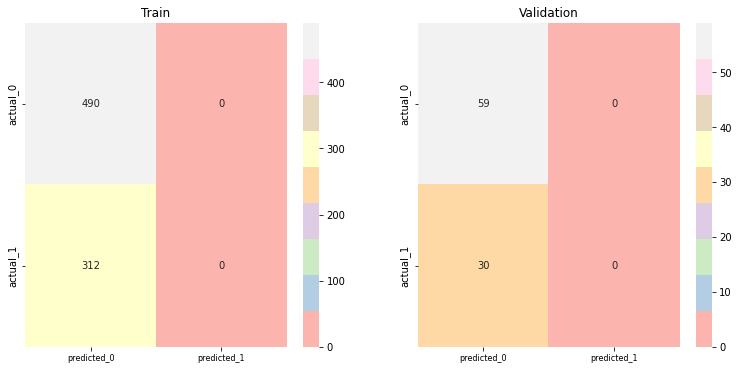

<ipython-input-29-29a4a5c81e1e>:5: RuntimeWarning:

invalid value encountered in long_scalars



,Tarin,Validation
precision,NaN,NaN
recall,0.000000,0.000000
specificity,1.000000,1.000000
fpr,0.000000,0.000000
accuracy,0.610973,0.662921
f1,NaN,NaN
balanced accuracy,0.500000,0.500000


mean cv val score: 0.62
mean cv val loss 0.64
mean cv train score: 0.62
mean cv train loss 0.64


In [ ]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features, t, NBC_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

the model preforms so poorly  so in this case so we can immediately disqualified the model.

**Results Summary**

We continued were we left of with the SGDClassifier as the best model in hand, we optimized it further by feature selection that gave us the best subset of features (got 4) that produce the best results with that model.

Then we use Search methods to get the best hyper parameters for the model and took them from the gridSearch method that were better.

Then we applied embedding techniques such as bagging and boosting and suprisingly found a better model based on Decidion Tree (that we have yet to learn about) in the use of boosting.

In the same way we tried to optimize KNN model and NBC model, the KNN preformed well while the NBC did not (we search and run nboth for their hyper parameters).


**Test** - Lastly we shall use the best model to create our submmission slate

In [ ]:
# preper test data
test_df = pd.read_csv("/content/drive/MyDrive/CS - Courses/ML/EX3/test.csv")
insert_median(test_df, 'Age')
insert_random_option(test_df, 'Cabin')
insert_random_option(test_df, 'Fare')
insert_random_option(test_df, 'Embarked')
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_df['Cabin'] = lb.fit_transform(test_df['Cabin'])
test_df['Embarked'] = lb.fit_transform(test_df['Embarked'])
test_df_cat = test_df[['Sex']]
test_df_cat_enc = pd.DataFrame(enc.fit_transform(test_df_cat), columns=enc.get_feature_names_out())
test_df = test_df.drop(['Sex'], axis=1).join(test_df_cat_enc) # remove Sex column and concations the encoding column
test_df = test_df.drop(['Cabin'], axis=1)
check_missing_values_in_df(test_df)
test_df

missing values
------------
Pclass: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0
Sex_male: 0


,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,3,34.5,0,0,7.8292,1,1.0
1,3,47.0,1,0,7.0000,2,0.0
2,2,62.0,0,0,9.6875,1,1.0
3,3,27.0,0,0,8.6625,2,1.0
4,3,22.0,1,1,12.2875,2,0.0
...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,2,1.0
414,1,39.0,0,0,108.9000,0,0.0
415,3,38.5,0,0,7.2500,2,1.0
416,3,27.0,0,0,8.0500,2,1.0


In [ ]:
# leave in only selected features
test_selected_features = test_df[X_selected_features.columns]
test_selected_features

,Pclass,Age,SibSp,Sex_male
0,3,34.5,0,1.0
1,3,47.0,1,0.0
2,2,62.0,0,1.0
3,3,27.0,0,1.0
4,3,22.0,1,0.0
...,...,...,...,...
413,3,27.0,0,1.0
414,1,39.0,0,0.0
415,3,38.5,0,1.0
416,3,27.0,0,1.0


In [ ]:
# test normalization
test_numerical_cols = test_selected_features.columns
ct_test_std = ColumnTransformer([("scaling", MinMaxScaler(), test_numerical_cols)])
test_encoded = pd.DataFrame(ct_test_std.fit_transform(test_selected_features), columns=test_numerical_cols)

In [ ]:
test_encoded

,Pclass,Age,SibSp,Sex_male
0,1.0,0.452723,0.000,1.0
1,1.0,0.617566,0.125,0.0
2,0.5,0.815377,0.000,1.0
3,1.0,0.353818,0.000,1.0
4,1.0,0.287881,0.125,0.0
...,...,...,...,...
413,1.0,0.353818,0.000,1.0
414,0.0,0.512066,0.000,0.0
415,1.0,0.505473,0.000,1.0
416,1.0,0.353818,0.000,1.0


In [ ]:
# create and train final model
hyper_parameters = {'n_neighbors': list(range(1, 20))}
model = KNeighborsClassifier(n_neighbors= 7).fit(X_selected_features, t)
submission_preds = model.predict(test_encoded)

In [ ]:
submission_passengers_id = submission_df['PassengerId']
submission_passengers_id 

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [ ]:
# create the submission file

submission = pd.DataFrame({
        'PassengerId': submission_passengers_id,
        'Survived': submission_preds
    })
submission.to_csv('submission.csv', index=False)
display(submission)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


**Submissions and Leaderboard**

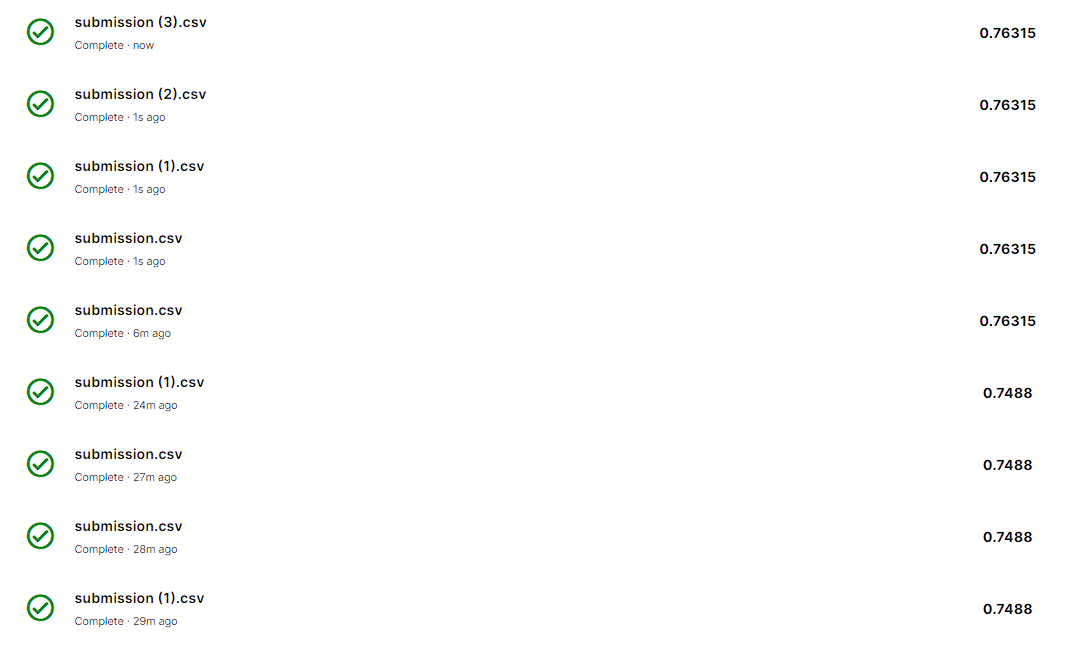

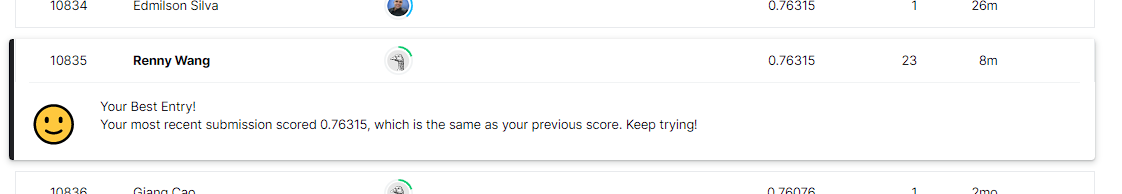

Last Remarks:

Our latest enty raised our score although withing a small degree, since we tested so many different type of models and tried to optimize them with quite a few methods I suspect that to make any bigger improvments we must edit and clean the original data to better the models training.
For example we might have been to harsh in erasing features for any reason or we should consider polynomial degree of our inputs for the model.

To Be Continued...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%shell
jupyter nbconvert --to html /content/ex3_titanic.ipynb

[NbConvertApp] WARNING | pattern '/content/ex3_titanic.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--ex

CalledProcessError: ignored